* 导入机器学习算法相关工具包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

1. 加载数据

In [ ]:
data_Raisin = pd.read_csv('Raisin_Dataset.csv')
data_Raisin.head()

In [3]:
# 特征集,包含前7列数据
X = data_Raisin.iloc[:, 0: 7]
print('X:\n',X)

X:
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  
2    0.637613   1208.575  

In [4]:
# 标签集,最后一列数据
# 对Class进行编码
data_Raisin = data_Raisin.replace({'Class':{'Kecimen':1, 'Besni':0}})
Y = data_Raisin.iloc[:, 7]
print('Y:\n',Y)

Y:
 0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int64


2. 数据预处理

In [5]:
# 标准化——（0-1标准化）
scaler= StandardScaler()
scaler.fit(data_Raisin.drop('Class', axis=1))
sc_transform= scaler.transform(data_Raisin.drop('Class', axis=1))
sc_df= pd.DataFrame(sc_transform)


In [6]:
# 拆分数据集
# 按拆分比例8：2将数据集切分为训练集和测试集，使用sklearn中model_selection模块中的train_test_split方法。
# test_size为测试集的比例，random_state为随机种子，这里可设置任意数字，保证下次运行同样可以选择出对应的训练集和测试集
X= sc_transform
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
print(Y_train)

823    0
43     1
890    0
542    0
507    0
      ..
358    1
356    1
812    0
132    1
885    0
Name: Class, Length: 720, dtype: int64


3. 算法应用 : K-最近邻 (KNN)

In [7]:
# 构建KNN模型(使用两种不同的KNN算法)

# n_neighbors,整数,也就是k值
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, Y_train)
score1 = knn1.score(X_test, Y_test)

# weights,默认为‘uniform’;这个参数可以针对不同的邻居指定不同的权重,也就是说,越近可以权重越高,默认是一样的权重;‘distance’可以设置不同权重
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2.fit(X_train, Y_train)
score2 = knn2.score(X_test, Y_test)

print(score1, score2)

0.8388888888888889 0.8277777777777777


In [8]:
# 交叉验证, 选出最优的KNN算法
result1 = cross_val_score(knn1, X, Y, cv=10)
result2 = cross_val_score(knn2, X, Y, cv=10)

print(result1.mean(), result2.mean())

0.8533333333333333 0.8533333333333333


In [9]:
# 训练模型
knn1.fit(X_train, Y_train)

KNeighborsClassifier()

In [10]:
# 评估模型
score = knn1.score(X_test, Y_test)

In [11]:
# 打印分数
print(score)

0.8388888888888889


In [12]:
# 使用测试集对模型进行预测
y_predict = knn1.predict(X_test)
print(y_predict[0])

1


4. 可视化分析

In [13]:
print(X_test)

[[-0.67336668 -0.77732022 -0.46141765 ... -0.68729824  0.66049896
  -0.76606471]
 [-0.429706   -0.57065146 -0.09536943 ... -0.44740113  0.53033508
  -0.5069242 ]
 [ 0.79998774  0.4519252   1.21615226 ...  0.76543525  1.58985364
   0.69620937]
 ...
 [-1.05702066 -1.32427201 -0.76491641 ... -1.04865324  1.16293424
  -1.26383494]
 [ 2.06441685  1.94160723  1.48112658 ...  2.03933188 -0.33625958
   1.89822091]
 [ 1.997845    1.58903086  1.8457174  ...  1.95765642  0.67958023
   1.71733715]]


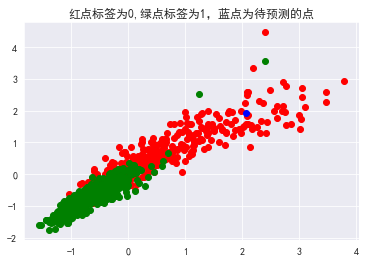

In [14]:
#target=0的点标红，target=1的点标绿,点的横坐标为X_train的第⼀列，点的纵坐标为X_train的第⼆列
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号’-'显示为方块的问
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],color='red')
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],color='green')
x=np.array([2.06441685,1.94160723]) #定义一个新的点，需要判断它到底属于哪一类数据类型
plt.scatter(x[0],x[1],color="blue") #在算点图上输出这个散点，看它在整体散点图的分布情况
plt.title('红点标签为0,绿点标签为1，蓝点为待预测的点')
plt.show()

